In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./../dist/accurate-dataset.csv')
df.head()

,Aduan,Label
0,cara ajar guru kurang interaktif jadi siswa ce...,Kurikulum
1,cara ajar guru terlalu text book,Kurikulum
2,papan tulis di kelas a sudah burik tolong untu...,Prasarana
3,kipas angin di kelas c sudah tidak jalan mesti...,Prasarana
4,perlu tambah ekstrakulikuler graphic designer,Kesiswaan


In [3]:
df['Label'].unique()

array(['Kurikulum', 'Prasarana', 'Kesiswaan'], dtype=object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Aduan   48 non-null     object
 1   Label   48 non-null     object
dtypes: object(2)
memory usage: 900.0+ bytes


In [5]:
X_text = df['Aduan']
y = df['Label']

In [6]:
X_text.head()

0    cara ajar guru kurang interaktif jadi siswa ce...
1                     cara ajar guru terlalu text book
2    papan tulis di kelas a sudah burik tolong untu...
3    kipas angin di kelas c sudah tidak jalan mesti...
4        perlu tambah ekstrakulikuler graphic designer
Name: Aduan, dtype: object

In [7]:
y.head()

0    Kurikulum
1    Kurikulum
2    Prasarana
3    Prasarana
4    Kesiswaan
Name: Label, dtype: object

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X_text)

In [9]:
print(X.shape)
print(y.shape)

(48, 189)
(48,)


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)

(38, 189)
(10, 189)


In [11]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [12]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[3, 1, 0],
       [0, 1, 2],
       [0, 0, 3]])

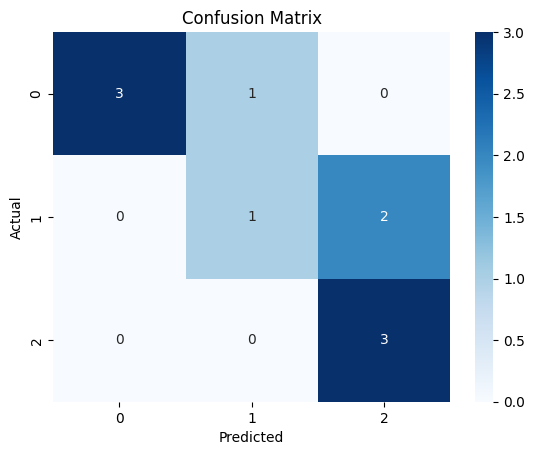

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi confusion matrix
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [14]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Accuracy: 0.7
Precision: 0.73
Recall: 0.7


In [15]:
input_saran = vectorizer.transform([
  'kipas angin rusak',
  'susah memahami belajar matematika',
  'sering terjadi perundungan di kelas',
])
predict = model.predict(input_saran)

print(predict)

['Prasarana' 'Kurikulum' 'Prasarana']
